In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import AdaBoostClassifier
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [2]:
df=pd.read_csv("lung-cancer.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 57 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   TARGET  32 non-null     int64
 1   F1      32 non-null     int64
 2   F2      32 non-null     int64
 3   F3      32 non-null     int64
 4   F4      32 non-null     int64
 5   F5      32 non-null     int64
 6   F6      32 non-null     int64
 7   F7      32 non-null     int64
 8   F8      32 non-null     int64
 9   F9      32 non-null     int64
 10  F10     32 non-null     int64
 11  F11     32 non-null     int64
 12  F12     32 non-null     int64
 13  F13     32 non-null     int64
 14  F14     32 non-null     int64
 15  F15     32 non-null     int64
 16  F16     32 non-null     int64
 17  F17     32 non-null     int64
 18  F18     32 non-null     int64
 19  F19     32 non-null     int64
 20  F20     32 non-null     int64
 21  F21     32 non-null     int64
 22  F22     32 non-null     int64
 23  F23     32 non-nu

In [4]:
df.isnull().sum()

TARGET    0
F1        0
F2        0
F3        0
F4        0
F5        0
F6        0
F7        0
F8        0
F9        0
F10       0
F11       0
F12       0
F13       0
F14       0
F15       0
F16       0
F17       0
F18       0
F19       0
F20       0
F21       0
F22       0
F23       0
F24       0
F25       0
F26       0
F27       0
F28       0
F29       0
F30       0
F31       0
F32       0
F33       0
F34       0
F35       0
F36       0
F37       0
F38       0
F39       0
F40       0
F41       0
F42       0
F43       0
F44       0
F45       0
F46       0
F47       0
F48       0
F49       0
F50       0
F51       0
F52       0
F53       0
F54       0
F55       0
F56       0
dtype: int64

In [5]:
df.describe()

,TARGET,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F47,F48,F49,F50,F51,F52,F53,F54,F55,F56
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,...,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,2.031250,0.031250,2.375000,2.031250,1.218750,0.281250,2.187500,2.125000,2.406250,1.156250,...,2.062500,2.062500,2.000000,2.000000,2.000000,1.843750,1.843750,1.562500,1.812500,1.718750
std,0.782237,0.176777,0.553581,1.031265,0.706394,0.456803,0.737804,0.751343,0.756024,0.514899,...,0.245935,0.245935,0.359211,0.359211,0.508001,0.447889,0.447889,0.504016,0.396558,0.456803
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,0.000000,2.000000,1.750000,1.000000,0.000000,2.000000,2.000000,2.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000
50%,2.000000,0.000000,2.000000,2.000000,1.000000,0.000000,2.000000,2.000000,3.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
75%,3.000000,0.000000,3.000000,3.000000,2.000000,1.000000,3.000000,3.000000,3.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,3.000000,1.000000,3.000000,3.000000,2.000000,1.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000


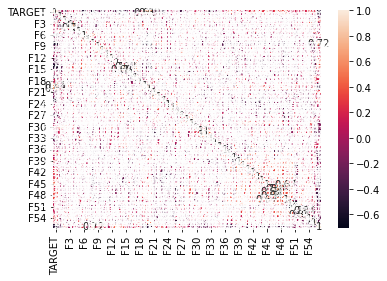

In [6]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [7]:
X = df.iloc[:,1:57]
Y = df.iloc[:, :1]

In [8]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [9]:
ada=AdaBoostClassifier(n_estimators=50,learning_rate=1)

In [10]:
model=ada.fit(X_train,Y_train)

C:\Users\Charan Lanka\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
Y_pred=model.predict(X_test)

In [13]:
print("Accuracy: ",metrics.accuracy_score(Y_test,Y_pred)*100)

Accuracy:  71.42857142857143


In [37]:

rf = RandomForestClassifier(n_estimators = 1,criterion="entropy")

In [38]:
model2=rf.fit(X_train,Y_train)

C:\Users\CHARAN~1\AppData\Local\Temp/ipykernel_6620/3765084921.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model2=rf.fit(X_train,Y_train)


In [39]:
Y_pre=model2.predict(X_test)

In [40]:
print("Accuracy: ",metrics.accuracy_score(Y_test,Y_pre)*100)

Accuracy:  57.14285714285714
